# Building the deferred waterfall from the forecast

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pickle


input_df_dict_long = {'model_dict': model_dict,
                 'billings':df_billings, 
                 'ADBE_cal':df_cal,
                 'bookings': df_bookings,
                 'FX_forwards': df_FX_fwds,
                 'FX_rates': df_FX_rates,
                 'forecast': df_fcst,
                 'final': df
                }

In [2]:
saved_dict = pickle.load( open('../data/processed/final_forecast.p', 'rb'))

In [3]:
saved_dict.keys()


dict_keys(['model_dict', 'ADBE_cal', 'bookings', 'FX_forwards', 'FX_rates', 'final', 'billings', 'forecast', 'initial_waterfall'])

In [5]:
df_waterfall = saved_dict['initial_waterfall']

In [6]:
df_waterfall.head(10)

,As Performed / Upon Acceptance,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,5.072172e+06,1.664945e+08,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,...,3.813405e+06,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06
Digital Media,5.601745e+06,3.506325e+08,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,...,2.773333e+06,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07
Grand inclusive of Magento/Marketo,1.067392e+07,5.274594e+08,5.274594e+08,5.274594e+08,3.275887e+08,3.275887e+08,3.275887e+08,1.897708e+08,1.897708e+08,1.897708e+08,...,6.856067e+06,3085663.85,3085663.85,3085663.85,2.155525e+06,2.155525e+06,2.155525e+06,2.335949e+07,2.335949e+07,2.335949e+07
Publishing,0.000000e+00,1.033243e+07,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,...,2.693293e+05,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04


In [7]:
df_fcst = saved_dict['forecast']

In [8]:
df_fcst.head(10)

,BU,curr,period,recognized_DC,service_DC,deferred_B_DC,deferred_1M_DC,deferred_3M_DC,deferred_6M_DC,deferred_1Y_DC,...,deferred_B_US,deferred_1M_US,deferred_3M_US,deferred_6M_US,deferred_1Y_US,deferred_2Y_US,deferred_3Y_US,book_1Y_DC,book_1Y_US,is_forecast
0,Creative,ARS,2020-07,6786.00,0.0,0.0,2.269996e+07,0.0,0.0,953875.89,...,0.0,311501.652502,0.0,0.0,13089.625145,0.0,0.0,0.0,0.0,1
1,Creative,ARS,2020-08,16472.00,0.0,0.0,2.408421e+07,0.0,0.0,963180.00,...,0.0,313752.445463,0.0,0.0,12547.641949,0.0,0.0,0.0,0.0,1
2,Creative,ARS,2020-09,19205.00,0.0,0.0,3.183559e+07,0.0,0.0,2263704.00,...,0.0,394732.702698,0.0,0.0,28067.897484,0.0,0.0,0.0,0.0,1
3,Creative,ARS,2020-10,30382.19,0.0,0.0,2.685273e+07,0.0,0.0,1318346.81,...,0.0,318570.748470,0.0,0.0,15640.375602,0.0,0.0,0.0,0.0,1
4,Creative,ARS,2020-11,59049.00,0.0,0.0,2.823698e+07,0.0,0.0,1494162.20,...,0.0,321124.778261,0.0,0.0,16992.342903,0.0,0.0,0.0,0.0,1
5,Creative,ARS,2020-12,71355.57,0.0,0.0,3.702655e+07,0.0,0.0,3154860.03,...,0.0,404344.684323,0.0,0.0,34452.328693,0.0,0.0,0.0,0.0,1
6,Creative,ARS,2021-01,79224.95,0.0,0.0,3.875687e+07,0.0,0.0,916705.92,...,0.0,404800.955688,0.0,0.0,9574.648808,0.0,0.0,0.0,0.0,1
7,Creative,ARS,2021-02,36596.00,0.0,0.0,3.238975e+07,0.0,0.0,1337025.94,...,0.0,324175.303733,0.0,0.0,13381.725308,0.0,0.0,0.0,0.0,1
8,Creative,ARS,2021-03,49107.00,0.0,0.0,4.221751e+07,0.0,0.0,2611544.83,...,0.0,405603.786576,0.0,0.0,25090.356687,0.0,0.0,0.0,0.0,1
9,Creative,ARS,2021-04,67878.00,0.0,0.0,3.515827e+07,0.0,0.0,3017041.60,...,0.0,328395.235993,0.0,0.0,28180.628770,0.0,0.0,0.0,0.0,1


# NEED TO DECIDE IF I WANT TO CREATE THE ENTIRE HISTORY OF THE WATERFALL OR NOT

As a check, I should build it historically

- rows are dates, columns are future amounts expected to be amortized
- by currency, BU

Columns
 - total
 - p_1
 - p_2
 - p_3 (etc out 36 months)
 
 - We are taking the USD equivalent and splitting this into the other areas
 
##### Monthly Billings
- 1/2 of the current month + 1/2 of the prior month

##### Annual Billings
- 1/12 of the current annual billings + 11 of the last annual billings + 1/12 of the year prior billings

#### Quarterly

# NOTE: I am ignoring Deferred Type B (Service) billings - for now


In [12]:
# The index is not necessary to create this dataframe

In [14]:
def find_unique_curr_and_BU(df_billings):
    v_BU = df_billings['BU'].copy()
    v_curr = df_billings['curr'].copy()
    v_both = v_BU + v_curr
    v_unique = v_both.unique()

    v_un_BU = [sub[:-3] for sub in v_unique]
    v_un_curr = [sub[-3:] for sub in v_unique]

    return v_un_BU, v_un_curr

In [18]:
#???
#for item in wf_columns:
#    df_this_wf[item] = 0

In [32]:
df_this_wf.head(10)

,curr,BU,period,Total,p_1,p_2,p_3,p_4,p_5,p_6,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36
3650,USD,Creative,2015-01,0,2.034401e+07,2.691003e+06,2.600675e+06,2.510346e+06,2.510346e+06,2.505242e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3651,USD,Creative,2015-02,0,2.084789e+07,2.747817e+06,2.688317e+06,2.628817e+06,2.628817e+06,2.614130e+06,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,84.37500
3652,USD,Creative,2015-03,0,3.064613e+07,5.962207e+06,5.847421e+06,5.732635e+06,5.732635e+06,5.721229e+06,...,2237.877778,2237.877778,2237.877778,2237.877778,2237.877778,2237.877778,2237.877778,2237.877778,2237.877778,1258.80625
3653,USD,Creative,2015-04,0,2.372656e+07,3.161062e+06,3.095507e+06,3.029952e+06,3.029952e+06,3.017452e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3654,USD,Creative,2015-05,0,2.393759e+07,3.576433e+06,3.509680e+06,3.442928e+06,3.442928e+06,3.440693e+06,...,9229.388889,9229.388889,9229.388889,9229.388889,9229.388889,9229.388889,9229.388889,9229.388889,9229.388889,5191.53125
3655,USD,Creative,2015-06,0,3.430681e+07,7.179767e+06,7.060031e+06,6.940296e+06,6.940296e+06,6.930419e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3656,USD,Creative,2015-07,0,2.686806e+07,4.527881e+06,4.433514e+06,4.339147e+06,4.339147e+06,4.323994e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3657,USD,Creative,2015-08,0,2.824064e+07,4.701643e+06,4.631398e+06,4.561152e+06,4.561152e+06,4.529258e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3658,USD,Creative,2015-09,0,3.994772e+07,9.904340e+06,9.756823e+06,9.609307e+06,9.609307e+06,9.601019e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3659,USD,Creative,2015-10,0,3.044511e+07,5.723848e+06,5.629209e+06,5.534571e+06,5.534571e+06,5.514375e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


### Deferred Revenue Assumptions

##### Monthly Deferred Billings
These occur in the middle of the month. Half the billings go directly to revenue, the remainder amortize out of deferred the next month

##### Three Month Deferred Billings
These are assumed to occur at the end of the period. 

In [10]:
def build_deferred_waterfall(df_billings):
    
    #Finding the unique currencies and BUs to slice the dataframe and build a waterfall for each
    v_un_BU, v_un_curr = find_unique_curr_and_BU(df_billings)
    
    # creating the waterfall list of numeric columns
    wf_columns = ['Total']
    for i in np.arange(36):
        this_column = 'p_'+ str(i+1)
        wf_columns.append(this_column)

    # creating the loop for the individual BU/curr waterfalls
    for i in range(len(v_un_BU)):
        this_BU = v_un_BU[i]
        this_curr = v_un_curr[i]
        
        print('working on BU: {0}  and currency: {1}'.format(this_BU, this_curr))
        this_slice = df_billings[(df_billings['BU']==this_BU) &
                                (df_billings['curr']== this_curr)].copy()
        
        df_this_wf = this_slice[['curr', 'BU', 'period']].copy()
        for item in wf_columns:
            df_this_wf[item] = 0
        
        df_this_wf = build_deferred_waterfall_slice(df_this_wf, this_slice)
        df_this_wf = bring_wf_forward(df_this_wf)
        
        if i == 0:
            df_waterfall = df_this_wf.copy()
        else:
            df_waterfall = pd.concat([df_waterfall, df_this_wf], sort=False)
    df_waterfall.reset_index(drop=True, inplace=True)
    return df_waterfall

In [16]:
def build_deferred_waterfall_slice(df_this_wf, this_slice):
    # Need to add half to the revenue piece
    df_this_wf['p_1'] += this_slice['deferred_1M_US']* 0.5

    # 1/6 goes to revenue in the period it is billed
    df_this_wf['p_1'] += this_slice['deferred_3M_US']* (1/3)
    df_this_wf['p_2'] += this_slice['deferred_3M_US']* (1/3)
    df_this_wf['p_3'] += this_slice['deferred_3M_US']* (1/6)

    # 1/12th directly to revenue
    df_this_wf['p_1'] += this_slice['deferred_6M_US']* (1/6)
    df_this_wf['p_2'] += this_slice['deferred_6M_US']* (1/6)
    df_this_wf['p_3'] += this_slice['deferred_6M_US']* (1/6)
    df_this_wf['p_4'] += this_slice['deferred_6M_US']* (1/6)
    df_this_wf['p_5'] += this_slice['deferred_6M_US']* (1/6)
    df_this_wf['p_6'] += this_slice['deferred_6M_US']* (1/12)



    # 1/24th directly to revenue
    df_this_wf['p_1'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_2'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_3'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_4'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_5'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_6'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_7'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_8'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_9'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_10'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_11'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_12'] += this_slice['deferred_1Y_US']* (1/24)

    # 1/24th 1 year bookings
    df_this_wf['p_1'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_2'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_3'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_4'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_5'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_6'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_7'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_8'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_9'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_10'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_11'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_12'] += this_slice['book_1Y_US']* (1/24)

    # Two year
    # 1/48th directly to revenue
    df_this_wf['p_1'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_2'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_3'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_4'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_5'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_6'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_7'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_8'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_9'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_10'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_11'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_12'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_13'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_14'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_15'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_16'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_17'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_18'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_19'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_20'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_21'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_22'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_23'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_24'] += this_slice['deferred_2Y_US']* (1/48)

    # Three year
    # 1/72nth directly to revenue
    df_this_wf['p_1'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_2'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_3'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_4'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_5'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_6'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_7'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_8'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_9'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_10'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_11'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_12'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_13'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_14'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_15'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_16'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_17'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_18'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_19'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_20'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_21'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_22'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_23'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_24'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_25'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_26'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_27'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_28'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_29'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_30'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_31'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_32'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_33'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_34'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_35'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_36'] += this_slice['deferred_3Y_US']* (1/72)

    return df_this_wf

In [19]:
def bring_wf_forward(df):
    wf_cols_copy = df.columns.str.contains('p_')
    df = df.reset_index(drop=True)
    for index, row in df.iterrows():
        
        if index <len(df) - 1:            
            this_row = df.loc[index, wf_cols_copy].to_numpy()            
            this_row = np.delete(this_row, 0)
            this_row = np.append(this_row, [0])           
            df.loc[index+1, wf_cols_copy] += this_row          
            
    return df

In [20]:
df_wf = build_deferred_waterfall(df_fcst)

working on BU: Creative  and currency: ARS
working on BU: DX Other  and currency: ARS
working on BU: Document Cloud  and currency: ARS
working on BU: Experience Cloud  and currency: ARS
working on BU: Print & Publishing  and currency: ARS
working on BU: Creative  and currency: AUD
working on BU: DX Other  and currency: AUD
working on BU: Document Cloud  and currency: AUD
working on BU: Experience Cloud  and currency: AUD
working on BU: Print & Publishing  and currency: AUD
working on BU: Creative  and currency: BRL
working on BU: DX Other  and currency: BRL
working on BU: Document Cloud  and currency: BRL
working on BU: Experience Cloud  and currency: BRL
working on BU: Print & Publishing  and currency: BRL
working on BU: Creative  and currency: CAD
working on BU: DX Other  and currency: CAD
working on BU: Document Cloud  and currency: CAD
working on BU: Experience Cloud  and currency: CAD
working on BU: Print & Publishing  and currency: CAD
working on BU: Creative  and currency: CHF
w

In [205]:
df_wf = df_wf.reset_index(drop=True)

In [22]:
df_wf.tail(40)

,curr,BU,period,Total,p_1,p_2,p_3,p_4,p_5,p_6,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36
1580,USD,DX Other,2021-03,0,3.706151e+05,3.885634e+05,3.745821e+05,3.269123e+05,2.594765e+05,2.330252e+05,...,6245.833333,6245.833333,6245.833333,6245.833333,6245.833333,3122.916667,0.000000,0.000000,-1520.746528,-1520.746528
1581,USD,DX Other,2021-04,0,4.428801e+05,4.546519e+05,4.002937e+05,3.261694e+05,2.997181e+05,2.884291e+05,...,6245.833333,6245.833333,6245.833333,6245.833333,3122.916667,0.000000,0.000000,-1520.746528,-1520.746528,0.000000
1582,USD,DX Other,2021-05,0,5.523792e+05,5.257244e+05,4.464834e+05,4.149155e+05,4.036265e+05,3.659062e+05,...,6245.833333,6245.833333,6245.833333,3122.916667,0.000000,0.000000,-1520.746528,-1520.746528,0.000000,0.000000
1583,USD,DX Other,2021-06,0,5.185206e+05,4.763467e+05,4.359142e+05,4.157607e+05,3.780403e+05,3.264870e+05,...,6245.833333,6245.833333,3122.916667,0.000000,0.000000,-1520.746528,-1520.746528,0.000000,0.000000,0.000000
1584,USD,Document Cloud,2020-07,0,6.563966e+06,4.467255e+06,4.426557e+06,4.385859e+06,4.385859e+06,4.385859e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1585,USD,Document Cloud,2020-08,0,1.004977e+07,7.899081e+06,7.852222e+06,7.846061e+06,7.846061e+06,7.843737e+06,...,173.611111,173.611111,173.611111,173.611111,173.611111,173.611111,173.611111,173.611111,173.611111,86.805556
1586,USD,Document Cloud,2020-09,0,1.765607e+07,1.495511e+07,1.493971e+07,1.493047e+07,1.492815e+07,1.492517e+07,...,173.611111,173.611111,173.611111,173.611111,173.611111,173.611111,173.611111,173.611111,86.805556,0.000000
1587,USD,Document Cloud,2020-10,0,2.177467e+07,1.962271e+07,1.957277e+07,1.952975e+07,1.952677e+07,1.952303e+07,...,173.611111,173.611111,173.611111,173.611111,173.611111,173.611111,173.611111,86.805556,0.000000,0.000000
1588,USD,Document Cloud,2020-11,0,2.768680e+07,2.548701e+07,2.543782e+07,2.542869e+07,2.542495e+07,2.542186e+07,...,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,376.194444,289.388889,289.388889,144.694444
1589,USD,Document Cloud,2020-12,0,3.641964e+07,3.366653e+07,3.364816e+07,3.363518e+07,3.363209e+07,3.363209e+07,...,520.915278,520.915278,520.915278,520.915278,520.915278,434.109722,347.304167,347.304167,202.609722,28.957639


In [23]:
this_wf = df_wf[(df_wf['BU']=='Creative')&
               (df_wf['curr']=='USD')]

In [24]:
this_wf

,curr,BU,period,Total,p_1,p_2,p_3,p_4,p_5,p_6,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36
1560,USD,Creative,2020-07,0,1.024249e+08,1.293985e+07,1.271985e+07,1.249985e+07,1.249985e+07,1.242120e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1561,USD,Creative,2020-08,0,1.150679e+08,2.422592e+07,2.400554e+07,2.400517e+07,2.392651e+07,2.383474e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1562,USD,Creative,2020-09,0,1.589772e+08,4.405817e+07,4.405626e+07,4.397607e+07,4.388430e+07,4.385578e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1563,USD,Creative,2020-10,0,1.503049e+08,5.740712e+07,5.710693e+07,5.679516e+07,5.676664e+07,5.673770e+07,...,531.718056,531.718056,531.718056,531.718056,531.718056,531.718056,531.718056,531.718056,531.718056,265.859028
1564,USD,Creative,2020-11,0,1.657376e+08,7.140471e+07,7.109256e+07,7.106366e+07,7.103472e+07,7.102118e+07,...,1407.194444,1407.194444,1407.194444,1407.194444,1407.194444,1407.194444,1407.194444,1407.194444,1141.335417,437.738194
1565,USD,Creative,2020-12,0,2.102890e+08,9.101478e+07,9.098435e+07,9.095387e+07,9.094034e+07,9.094027e+07,...,1995.359167,1995.359167,1995.359167,1995.359167,1995.359167,1995.359167,1995.359167,1729.500139,1025.902917,294.082361
1566,USD,Creative,2021-01,0,2.245385e+08,1.041249e+08,1.038744e+08,1.036409e+08,1.036408e+08,9.739273e+07,...,2035.351111,2035.351111,2035.351111,2035.351111,2035.351111,2035.351111,1769.492083,1065.894861,334.074306,19.995972
1567,USD,Creative,2021-02,0,2.111998e+08,1.135058e+08,1.132719e+08,1.132715e+08,1.070234e+08,9.502293e+07,...,2186.347222,2186.347222,2186.347222,2186.347222,2186.347222,1920.488194,1216.890972,485.070417,170.992083,75.498056
1568,USD,Creative,2021-03,0,2.516739e+08,1.282145e+08,1.282125e+08,1.219629e+08,1.099624e+08,9.418885e+07,...,3718.157222,3718.157222,3718.157222,3718.157222,3452.298194,2748.700972,2016.880417,1702.802083,1607.308056,765.905000
1569,USD,Creative,2021-04,0,2.388128e+08,1.390935e+08,1.326239e+08,1.204034e+08,1.046299e+08,8.815452e+07,...,4038.028333,4038.028333,4038.028333,3772.169306,3068.572083,2336.751528,2022.673194,1927.179167,1085.776111,159.935556


,Total,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36
count,63.0,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.0,1.541063e+08,9.197557e+07,8.412930e+07,7.617937e+07,6.817164e+07,5.988598e+07,5.132938e+07,4.257263e+07,3.353753e+07,...,5687.322726,5097.686059,4506.621333,3913.588927,3317.446306,2719.177724,2119.100768,1516.834487,912.093231,304.559858
std,0.0,6.843615e+07,4.160147e+07,3.733900e+07,3.323470e+07,2.938788e+07,2.537664e+07,2.139029e+07,1.757374e+07,1.350669e+07,...,5032.221596,4968.006788,4843.028217,4653.399664,4398.431113,4063.059274,3617.242395,3041.701653,2307.809438,1060.882762
min,0.0,2.034401e+07,2.691003e+06,2.600675e+06,2.510346e+06,2.510346e+06,2.505242e+06,2.500138e+06,2.500138e+06,2.500138e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.085215e+08,6.740614e+07,6.180298e+07,5.585227e+07,4.951671e+07,4.328370e+07,3.658726e+07,2.963836e+07,2.356853e+07,...,1334.373681,1126.472361,727.731597,85.576042,19.883333,14.938021,11.520833,3.950000,0.000000,0.000000
50%,0.0,1.548741e+08,9.044893e+07,8.050191e+07,7.189699e+07,6.595620e+07,5.857339e+07,5.037948e+07,4.023418e+07,3.179270e+07,...,4057.049167,3718.157222,2387.877778,1995.359167,883.613333,683.621389,509.802639,353.762361,171.895278,19.995972
75%,0.0,2.076135e+08,1.248669e+08,1.145458e+08,1.040710e+08,9.088405e+07,8.066798e+07,6.840318e+07,5.718888e+07,4.532125e+07,...,10945.297222,8661.944306,7109.346597,5814.812431,4714.932222,3379.345208,2280.249306,1684.247986,377.344792,99.949653
max,0.0,2.889028e+08,1.638795e+08,1.472698e+08,1.329665e+08,1.195349e+08,1.055222e+08,9.156917e+07,7.771375e+07,6.025683e+07,...,13910.040972,13910.040972,13910.040972,13910.040972,13910.040972,13901.290972,13898.374306,13888.888889,13888.888889,6944.444444


### So I have the deferred waterfall by DC, period, BU.
# I need to groupby BU and Period

In [27]:
df_wf_gb = df_wf.groupby(['BU', 'period']).sum()

In [29]:
df_wf_gb.head(40)

Total           p_1           p_2           p_3  \
BU               period                                                     
Creative         2020-07      0  1.930312e+08  3.644362e+07  3.620280e+07   
                 2020-08      0  2.332456e+08  7.405676e+07  7.381550e+07   
                 2020-09      0  3.299288e+08  1.280511e+08  1.280491e+08   
                 2020-10      0  3.321239e+08  1.684541e+08  1.681331e+08   
                 2020-11      0  3.697148e+08  2.033671e+08  2.030341e+08   
                 2020-12      0  4.760072e+08  2.651920e+08  2.651607e+08   
                 2021-01      0  5.009844e+08  2.875125e+08  2.872403e+08   
                 2021-02      0  4.780736e+08  3.046816e+08  3.044267e+08   
                 2021-03      0  5.505606e+08  3.309460e+08  3.309439e+08   
                 2021-04      0  5.275642e+08  3.499515e+08  3.317355e+08   
                 2021-05      0  5.450119e+08  3.468342e+08  3.097040e+08   
                 2021-06      0  5.950106e+08  3.299893e+08  2.839668e+08   
DX Other         2020-07      0  1.291328e+05  1.357713e+05  1.290828e+05   
                 2020-08      0  2.336200e+05  2.354812e+05  2.211412e+05   
                 2020-09      0  2.523718e+05  2.511080e+05  2.345919e+05   
                 2020-10      0  2.999885e+05  2.958445e+05  2.802914e+05   
                 2020-11      0  3.734831e+05  3.722133e+05  3.578723e+05   
                 2020-12      0  4.435131e+05  4.494150e+05  4.328980e+05   
                 2021-01      0  4.570909e+05  4.632052e+05  4.476521e+05   
                 2021-02      0  4.884030e+05  4.928658e+05  4.785236e+05   
                 2021-03      0  5.584690e+05  5.715348e+05  5.497330e+05   
                 2021-04      0  6.343045e+05  6.363400e+05  5.543063e+05   
                 2021-05      0  7.517971e+05  6.955114e+05  5.744234e+05   
                 2021-06      0  7.086882e+05  6.221735e+05  5.539878e+05   
Document Cloud   2020-07      0  1.606238e+07  1.316662e+07  1.307255e+07   
                 2020-08      0  2.784763e+07  2.483391e+07  2.472507e+07   
                 2020-09      0  5.035804e+07  4.656980e+07  4.653127e+07   
                 2020-10      0  6.158957e+07  5.858365e+07  5.846570e+07   
                 2020-11      0  7.737987e+07  7.427065e+07  7.415938e+07   
                 2020-12      0  1.030800e+08  9.919982e+07  9.915363e+07   
                 2021-01      0  1.091998e+08  1.053548e+08  1.052283e+08   
                 2021-02      0  1.130855e+08  1.098960e+08  1.097833e+08   
                 2021-03      0  1.209448e+08  1.169734e+08  1.169332e+08   
                 2021-04      0  1.247670e+08  1.216189e+08  1.150183e+08   
                 2021-05      0  1.291667e+08  1.194344e+08  1.069850e+08   
                 2021-06      0  1.288306e+08  1.124370e+08  9.565289e+07   
Experience Cloud 2020-07      0  4.141912e+07  4.062435e+07  3.561768e+07   
                 2020-08      0  6.414265e+07  5.843812e+07  5.094200e+07   
                 2020-09      0  9.979851e+07  9.155122e+07  8.622170e+07   
                 2020-10      0  1.242633e+08  1.184298e+08  1.102970e+08   

                                   p_4           p_5           p_6  \
BU               period                                              
Creative         2020-07  3.596198e+07  3.596198e+07  3.588332e+07   
                 2020-08  7.381506e+07  7.373641e+07  7.364464e+07   
                 2020-09  1.279689e+08  1.278772e+08  1.278478e+08   
                 2020-10  1.678005e+08  1.677711e+08  1.677413e+08   
                 2020-11  2.030042e+08  2.029744e+08  2.029609e+08   
                 2020-12  2.651293e+08  2.651158e+08  2.651157e+08   
                 2021-01  2.869859e+08  2.869858e+08  2.690122e+08   
                 2021-02  3.044262e+08  2.864526e+08  2.495638e+08   
                 2021-03  3.129688e+08  2.760801e+08  2.300595e+08   
                 2021

### Now we need to group the BU to match the waterfall BUs

In [30]:
df_wf_gb.index

MultiIndex([(          'Creative', '2020-07'),
            (          'Creative', '2020-08'),
            (          'Creative', '2020-09'),
            (          'Creative', '2020-10'),
            (          'Creative', '2020-11'),
            (          'Creative', '2020-12'),
            (          'Creative', '2021-01'),
            (          'Creative', '2021-02'),
            (          'Creative', '2021-03'),
            (          'Creative', '2021-04'),
            (          'Creative', '2021-05'),
            (          'Creative', '2021-06'),
            (          'DX Other', '2020-07'),
            (          'DX Other', '2020-08'),
            (          'DX Other', '2020-09'),
            (          'DX Other', '2020-10'),
            (          'DX Other', '2020-11'),
            (          'DX Other', '2020-12'),
            (          'DX Other', '2021-01'),
            (          'DX Other', '2021-02'),
            (          'DX Other', '2021-03'),
            (

In [33]:
df_waterfall

,As Performed / Upon Acceptance,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,5.072172e+06,1.664945e+08,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,...,3.813405e+06,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06
Digital Media,5.601745e+06,3.506325e+08,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,...,2.773333e+06,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07
Grand inclusive of Magento/Marketo,1.067392e+07,5.274594e+08,5.274594e+08,5.274594e+08,3.275887e+08,3.275887e+08,3.275887e+08,1.897708e+08,1.897708e+08,1.897708e+08,...,6.856067e+06,3085663.85,3085663.85,3085663.85,2.155525e+06,2.155525e+06,2.155525e+06,2.335949e+07,2.335949e+07,2.335949e+07
Publishing,0.000000e+00,1.033243e+07,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,...,2.693293e+05,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04


In [34]:
df_wf_gb.reset_index(inplace=True)


In [38]:
df_wf_gb.head(5)

,BU,period,Total,p_1,p_2,p_3,p_4,p_5,p_6,p_7,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36
0,Digital Media,2020-07,0,1.930312e+08,3.644362e+07,3.620280e+07,3.596198e+07,3.596198e+07,3.588332e+07,3.580467e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Digital Media,2020-08,0,2.332456e+08,7.405676e+07,7.381550e+07,7.381506e+07,7.373641e+07,7.364464e+07,7.363152e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Digital Media,2020-09,0,3.299288e+08,1.280511e+08,1.280491e+08,1.279689e+08,1.278772e+08,1.278478e+08,1.278315e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Digital Media,2020-10,0,3.321239e+08,1.684541e+08,1.681331e+08,1.678005e+08,1.677711e+08,1.677413e+08,1.677277e+08,...,531.718056,531.718056,531.718056,531.718056,531.718056,531.718056,531.718056,531.718056,531.718056,265.859028
4,Digital Media,2020-11,0,3.697148e+08,2.033671e+08,2.030341e+08,2.030042e+08,2.029744e+08,2.029609e+08,2.029609e+08,...,1407.194444,1407.194444,1407.194444,1407.194444,1407.194444,1407.194444,1407.194444,1407.194444,1141.335417,437.738194


### Change the BU to match the waterfall BUs
 - Creative to Digital Media
 - Document Cloud to Digital Media
 - Print & Publishing to Publishing
 - DX Other to Digital Experience
 - Experience Cloud to Digital Experience

In [39]:
df_wf_gb['BU'] = df_wf_gb['BU'].str.replace('Creative', 'Digital Media')
df_wf_gb['BU'] = df_wf_gb['BU'].str.replace('Document Cloud', 'Digital Media')
df_wf_gb['BU'] = df_wf_gb['BU'].str.replace('DX Other', 'Digital Experience')
df_wf_gb['BU'] = df_wf_gb['BU'].str.replace('Experience Cloud', 'Digital Experience')
df_wf_gb['BU'] = df_wf_gb['BU'].str.replace('Print & Publishing', 'Publishing')


In [40]:
df_wf_gb['BU'].value_counts()

Digital Experience    24
Digital Media         24
Publishing            12
Name: BU, dtype: int64

In [42]:
df_wf_gb2 = df_wf_gb.groupby(['BU', 'period']).sum()

In [43]:
df_wf_gb2

Total           p_1           p_2           p_3  \
BU                 period                                                     
Digital Experience 2020-07      0  4.154825e+07  4.076013e+07  3.574676e+07   
                   2020-08      0  6.437627e+07  5.867360e+07  5.116314e+07   
                   2020-09      0  1.000509e+08  9.180232e+07  8.645629e+07   
                   2020-10      0  1.245633e+08  1.187256e+08  1.105773e+08   
                   2020-11      0  1.570176e+08  1.484765e+08  1.404566e+08   
                   2020-12      0  1.887256e+08  1.803382e+08  1.745268e+08   
                   2021-01      0  2.029145e+08  1.968591e+08  1.886194e+08   
                   2021-02      0  2.159175e+08  2.075815e+08  1.998470e+08   
                   2021-03      0  2.237692e+08  2.160379e+08  2.104064e+08   
                   2021-04      0  2.361310e+08  2.306010e+08  2.071699e+08   
                   2021-05      0  2.420762e+08  2.188454e+08  1.869921e+08   
                   2021-06      0  2.295923e+08  1.981129e+08  1.663223e+08   
Digital Media      2020-07      0  2.090935e+08  4.961025e+07  4.927535e+07   
                   2020-08      0  2.610932e+08  9.889067e+07  9.854057e+07   
                   2020-09      0  3.802869e+08  1.746209e+08  1.745804e+08   
                   2020-10      0  3.937134e+08  2.270378e+08  2.265988e+08   
                   2020-11      0  4.470946e+08  2.776378e+08  2.771934e+08   
                   2020-12      0  5.790872e+08  3.643918e+08  3.643143e+08   
                   2021-01      0  6.101843e+08  3.928673e+08  3.924686e+08   
                   2021-02      0  5.911591e+08  4.145776e+08  4.142100e+08   
                   2021-03      0  6.715054e+08  4.479193e+08  4.478771e+08   
                   2021-04      0  6.523312e+08  4.715704e+08  4.467537e+08   
                   2021-05      0  6.741786e+08  4.662686e+08  4.166890e+08   
                   2021-06      0  7.238412e+08  4.424263e+08  3.796197e+08   
Publishing         2020-07      0  1.180876e+06  9.343232e+05  9.151925e+05   
                   2020-08      0  1.934396e+06  1.670342e+06  1.615719e+06   
                   2020-09      0  3.702697e+06  3.343957e+06  3.307666e+06   
                   2020-10      0  4.717068e+06  4.439112e+06  4.418853e+06   
                   2020-11      0  5.696634e+06  5.436339e+06  5.380011e+06   
                   2020-12      0  7.283327e+06  6.928990e+06  6.891272e+06   
                   2021-01      0  7.868827e+06  7.535125e+06  7.515140e+06   
                   2021-02      0  8.467519e+06  8.212367e+06  8.157505e+06   
                   2021-03      0  9.558787e+06  9.211991e+06  9.169033e+06   
                   2021-04      0  1.026689e+07  9.992015e+06  9.519462e+06   
                   2021-05      0  1.118965e+07  1.048680e+07  9.645337e+06   
                   2021-06      0  1.209646e+07  1.096917e+07  9.731255e+06   

                                     p_4           p_5           p_6  \
BU                 period                                              
Digital Experience 2020-07  3.073339e+07  3.073339e+07  3.044889e+07   
                   2020-08  4.866604e+07  4.838154e+07  4.787500e+07   
                   2020-09  8.332284e+07  8.281630e+07  8.235306e+07   
                   2020-10  1.050558e+08  1.045926e+08  1.042191e+08   
                   2020-11  1.374948e+08  1.371214e+08  1.369034e+08   
                   2020-12  1.713036e+08  1.710856e+08  1.708049e+08   
                   2021-01  1.833849e+08  1.831042e+08  1.675421e+08   
                   2021-02  1.970663e+08  1.815042e+08  1.571705e+08   
                   2021-03  1.919936e+08  1.676599e+08  1.412223e+08   
                   2021-04  1.778180e+08  1.513804e+08  1.227897e+08   
                   2021-05  1.580531e+08  1.294624e+08  1.018950e+08   
                   2021-06  1.348800e+08  1.073126e+08  7.377359e+07   
Digital Media    

## Altering the initial waterfall fields

In [46]:
df_waterfall

,As Performed / Upon Acceptance,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,5.072172e+06,1.664945e+08,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,...,3.813405e+06,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06
Digital Media,5.601745e+06,3.506325e+08,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,...,2.773333e+06,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07
Publishing,0.000000e+00,1.033243e+07,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,...,2.693293e+05,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04


In [45]:
df_waterfall.drop('Grand inclusive of Magento/Marketo', inplace=True)

## Take the As Performed / Upon Acceptance column and place this into the df_wf_gb dataframe.
## We will assume that this does not change over time 

In [47]:
df_as_performed = df_waterfall['As Performed / Upon Acceptance'].copy()


In [48]:
df_as_performed

External Reporting BU
Digital Experience    5.072172e+06
Digital Media         5.601745e+06
Publishing            0.000000e+00
Name: As Performed / Upon Acceptance, dtype: float64

In [49]:
df_waterfall = df_waterfall.drop('As Performed / Upon Acceptance', axis=1)

In [50]:
df_waterfall

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,1.664945e+08,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,3.813405e+06,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06
Digital Media,3.506325e+08,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,...,2.773333e+06,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07
Publishing,1.033243e+07,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,...,2.693293e+05,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04


## Changing the periods in the df_wf_gb to match the df_watefall first

In [53]:
old_cols = df_wf_gb.columns
old_cols = old_cols[3:]

In [58]:
new_columns = []
for i in range(12*3):
    if len(str(i+1))==1:
        new_column = 'P0'+ str(i+1)
    else:
        new_column = 'P'+ str(i+1)
    new_columns.append(new_column)

In [65]:
rename_dict = dict(zip(old_cols, new_columns))
df_wf_gb = df_wf_gb.rename(columns=rename_dict)


In [66]:


df_wf_gb

,BU,period,Total,P01,P02,P03,P04,P05,P06,P07,...,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36
0,Digital Media,2020-07,0,1.930312e+08,3.644362e+07,3.620280e+07,3.596198e+07,3.596198e+07,3.588332e+07,3.580467e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Digital Media,2020-08,0,2.332456e+08,7.405676e+07,7.381550e+07,7.381506e+07,7.373641e+07,7.364464e+07,7.363152e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Digital Media,2020-09,0,3.299288e+08,1.280511e+08,1.280491e+08,1.279689e+08,1.278772e+08,1.278478e+08,1.278315e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Digital Media,2020-10,0,3.321239e+08,1.684541e+08,1.681331e+08,1.678005e+08,1.677711e+08,1.677413e+08,1.677277e+08,...,531.718056,531.718056,531.718056,531.718056,531.718056,531.718056,531.718056,531.718056,531.718056,265.859028
4,Digital Media,2020-11,0,3.697148e+08,2.033671e+08,2.030341e+08,2.030042e+08,2.029744e+08,2.029609e+08,2.029609e+08,...,1407.194444,1407.194444,1407.194444,1407.194444,1407.194444,1407.194444,1407.194444,1407.194444,1141.335417,437.738194
5,Digital Media,2020-12,0,4.760072e+08,2.651920e+08,2.651607e+08,2.651293e+08,2.651158e+08,2.651157e+08,2.472208e+08,...,1995.359167,1995.359167,1995.359167,1995.359167,1995.359167,1995.359167,1995.359167,1729.500139,1025.902917,294.082361
6,Digital Media,2021-01,0,5.009844e+08,2.875125e+08,2.872403e+08,2.869859e+08,2.869858e+08,2.690122e+08,2.321366e+08,...,2035.351111,2035.351111,2035.351111,2035.351111,2035.351111,2035.351111,1769.492083,1065.894861,334.074306,19.995972
7,Digital Media,2021-02,0,4.780736e+08,3.046816e+08,3.044267e+08,3.044262e+08,2.864526e+08,2.495638e+08,2.035595e+08,...,2186.347222,2186.347222,2186.347222,2186.347222,2186.347222,1920.488194,1216.890972,485.070417,170.992083,75.498056
8,Digital Media,2021-03,0,5.505606e+08,3.309460e+08,3.309439e+08,3.129688e+08,2.760801e+08,2.300595e+08,1.830116e+08,...,3718.157222,3718.157222,3718.157222,3718.157222,3452.298194,2748.700972,2016.880417,1702.802083,1607.308056,765.905000
9,Digital Media,2021-04,0,5.275642e+08,3.499515e+08,3.317355e+08,2.946057e+08,2.485851e+08,2.015237e+08,1.639743e+08,...,4038.028333,4038.028333,4038.028333,3772.169306,3068.572083,2336.751528,2022.673194,1927.179167,1085.776111,159.935556


In [64]:
dict(zip(old_cols, new_columns))

{'p_1': 'P01',
 'p_2': 'P02',
 'p_3': 'P03',
 'p_4': 'P04',
 'p_5': 'P05',
 'p_6': 'P06',
 'p_7': 'P07',
 'p_8': 'P08',
 'p_9': 'P09',
 'p_10': 'P10',
 'p_11': 'P11',
 'p_12': 'P12',
 'p_13': 'P13',
 'p_14': 'P14',
 'p_15': 'P15',
 'p_16': 'P16',
 'p_17': 'P17',
 'p_18': 'P18',
 'p_19': 'P19',
 'p_20': 'P20',
 'p_21': 'P21',
 'p_22': 'P22',
 'p_23': 'P23',
 'p_24': 'P24',
 'p_25': 'P25',
 'p_26': 'P26',
 'p_27': 'P27',
 'p_28': 'P28',
 'p_29': 'P29',
 'p_30': 'P30',
 'p_31': 'P31',
 'p_32': 'P32',
 'p_33': 'P33',
 'p_34': 'P34',
 'p_35': 'P35',
 'p_36': 'P36'}

In [57]:
whos

Variable                         Type         Data/Info
-------------------------------------------------------
bring_wf_forward                 function     <function bring_wf_forward at 0x117e53ea0>
build_deferred_waterfall         function     <function build_deferred_<...>waterfall at 0x117caa0d0>
build_deferred_waterfall_slice   function     <function build_deferred_<...>all_slice at 0x106e61d08>
df_as_performed                  Series       External Reporting BU\nDi<...>cceptance, dtype: float64
df_fcst                          DataFrame                          BU <...>n[1620 rows x 29 columns]
df_waterfall                     DataFrame                             <...>\n\n[3 rows x 27 columns]
df_wf                            DataFrame         curr                <...>n[1620 rows x 40 columns]
df_wf_gb                         DataFrame                        BU   <...>n\n[60 rows x 39 columns]
df_wf_gb2                        DataFrame                             <...>n\n[36 ro

## Add the as performed back into the waterfall forecast

# I need to create a way to graph this over time

In [218]:
df_wf['Total'] = df_wf[wf_columns[1:]].sum(axis=1)

In [220]:
df_wf.tail(10)

,curr,BU,period,Total,p_1,p_2,p_3,p_4,p_5,p_6,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36
6043,USD,Print & Publishing,2019-06,6.151203e+07,1.029590e+07,9.411551e+06,8.449200e+06,7.292245e+06,6.419806e+06,5.185047e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6044,USD,Print & Publishing,2019-07,6.018533e+07,1.037312e+07,9.229387e+06,8.060380e+06,7.175889e+06,5.941131e+06,4.836860e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6045,USD,Print & Publishing,2019-08,5.607353e+07,9.937908e+06,8.591956e+06,7.706091e+06,6.469957e+06,5.365686e+06,4.788531e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6046,USD,Print & Publishing,2019-09,6.364340e+07,1.031515e+07,9.213355e+06,7.972395e+06,6.863298e+06,6.286143e+06,5.445466e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6047,USD,Print & Publishing,2019-10,6.469364e+07,1.040470e+07,8.984846e+06,7.849929e+06,7.246954e+06,6.406278e+06,5.616601e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6048,USD,Print & Publishing,2019-11,6.436640e+07,1.007881e+07,8.760619e+06,8.125019e+06,7.251717e+06,6.462041e+06,6.015458e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6049,USD,Print & Publishing,2019-12,6.841463e+07,1.022641e+07,9.367610e+06,8.471588e+06,7.659192e+06,7.212610e+06,6.410932e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6050,USD,Print & Publishing,2020-01,6.345189e+07,9.988449e+06,8.914708e+06,8.098978e+06,7.649062e+06,6.847385e+06,5.883845e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6051,USD,Print & Publishing,2020-02,6.015781e+07,9.917408e+06,8.923918e+06,8.309239e+06,7.342798e+06,6.379258e+06,5.736013e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6052,USD,Print & Publishing,2020-03,6.229393e+07,1.021695e+07,9.375841e+06,8.381430e+06,7.389919e+06,6.746674e+06,5.733262e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


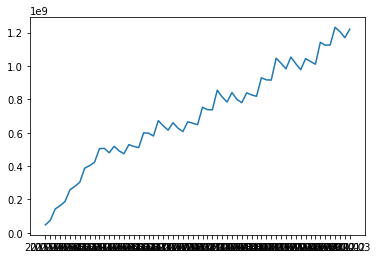

In [222]:
this_wf = df_wf[(df_wf['BU']=='Creative')&
                (df_wf['curr']=='USD')]
plt.plot(this_wf['period'],this_wf['Total'])

In [223]:
whos

Variable                         Type         Data/Info
-------------------------------------------------------
bring_wf_forward                 function     <function bring_wf_forward at 0x11cd33840>
build_deferred_waterfall         function     <function build_deferred_<...>waterfall at 0x11cd33c80>
build_deferred_waterfall_slice   function     <function build_deferred_<...>all_slice at 0x11baa7ae8>
data_test                        ndarray      5x5: 25 elems, type `float64`, 200 bytes
df_billings                      DataFrame         curr                <...>n[6053 rows x 23 columns]
df_fcst                          DataFrame         curr                <...>n[1620 rows x 27 columns]
df_test                          DataFrame         A    B    C    D    <...>  5.0  4.0  3.0  2.0  1.0
df_test_distrib                  DataFrame         curr        BU   per<...>n\n[63 rows x 40 columns]
df_test_distrib2                 DataFrame       curr        BU   perio<...>n\n[63 rows x 40 columns

In [224]:
saved_dict['wf']= df_wf

In [225]:
saved_dict.keys()

dict_keys(['model_dict', 'billings', 'ADBE_cal', 'bookings', 'FX_forwards', 'FX_rates', 'forecast', 'wf'])

In [226]:
pickle.dump(saved_dict, open('../data/processed/final_forecast.p', 'wb'))